In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [46]:
df=pd.read_csv("/Users/samarthgarg/Downloads/ML ETP/DataSets/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [47]:
X=df[['Level']]
y=df['Salary']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [50]:
poly = PolynomialFeatures(degree=3)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [51]:
pr=LinearRegression()
pr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
pr.fit(X_train,y_train)
y_pred=pr.predict(X_test)

In [53]:
r2_score(y_test,y_pred)

0.876269564783018

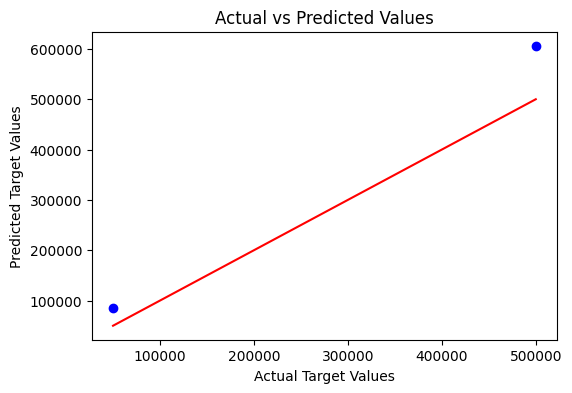

In [54]:
plt.figure(figsize=(6, 4))

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')

# Best fit (ideal) line: y = x
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)

plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted Values")
plt.show()

/opt/homebrew/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


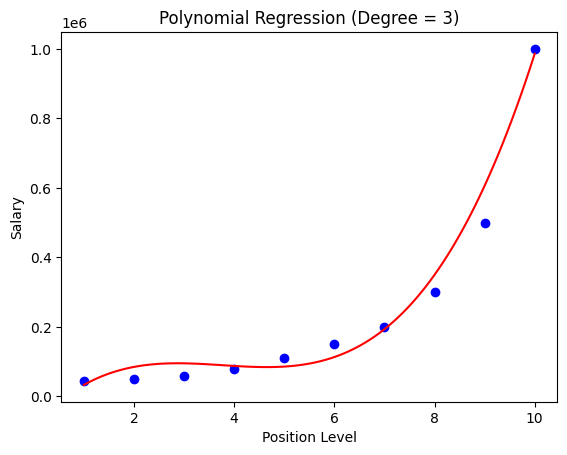

In [55]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = sc.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)
y_range_pred = pr.predict(X_range_poly)

plt.scatter(X, y, color='blue')
plt.plot(X_range, y_range_pred, color='red')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression (Degree = 3)")
plt.show()

In [56]:
manual_input = np.array([[6.5]])
manual_input_scaled = sc.transform(manual_input)
manual_input_poly = poly.transform(manual_input_scaled)
predicted_salary = pr.predict(manual_input_poly)

print("Predicted Salary for Level 6.5:", predicted_salary[0])

Predicted Salary for Level 6.5: 145306.94600786376


/opt/homebrew/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
